In [7]:
import pandas as pd
data = pd.read_csv('obesity_level.csv')  
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,normal_weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


RANDOM FOREST CLASSIFIER

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Define features and target variable
X = data.drop(columns=['0be1dad'])
y = data['0be1dad']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable on the test data
predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8894508670520231


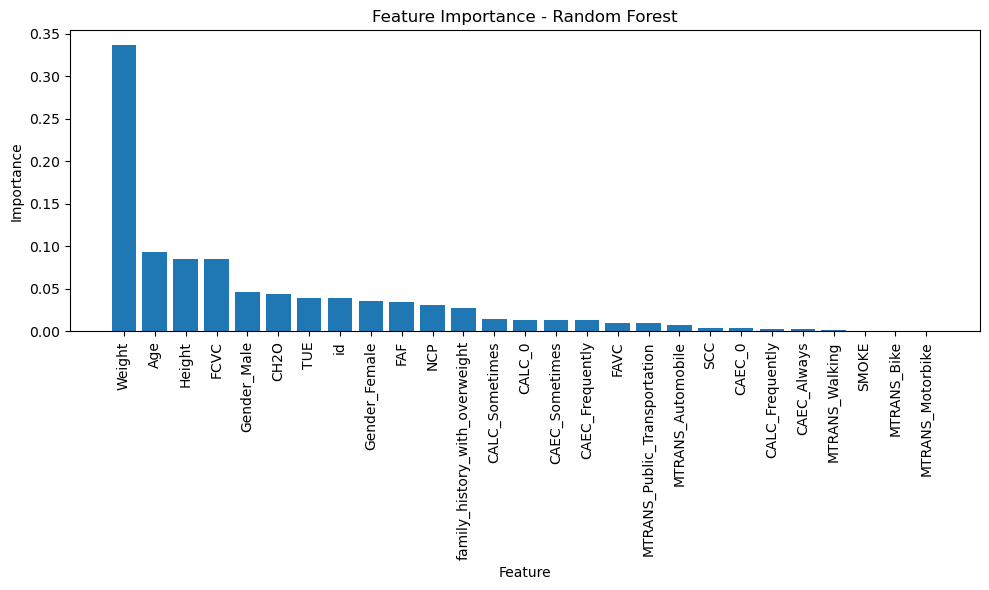

In [20]:
import matplotlib.pyplot as plt


# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features (columns)
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import classification_report


# Predict the target variable on the test data
predictions = rf_classifier.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.92       524
     Obesity_Type_I       0.89      0.86      0.87       543
    Obesity_Type_II       0.98      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.73      0.74       484
Overweight_Level_II       0.78      0.78      0.78       514
      normal_weight       0.81      0.88      0.85       626

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



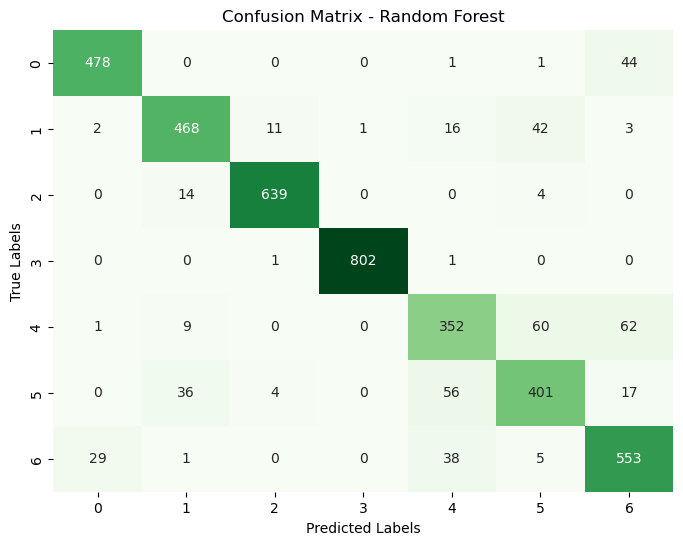

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target variable on the test data
predictions_rf = rf_classifier.predict(X_test)

# Generate a confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [11]:
data.columns


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad'],
      dtype='object')

NAIVE BAYES CLASSIFIER

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define features and target variable
X = data.drop(columns=['0be1dad'])
y = data['0be1dad']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the test data
predictions = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6748554913294798


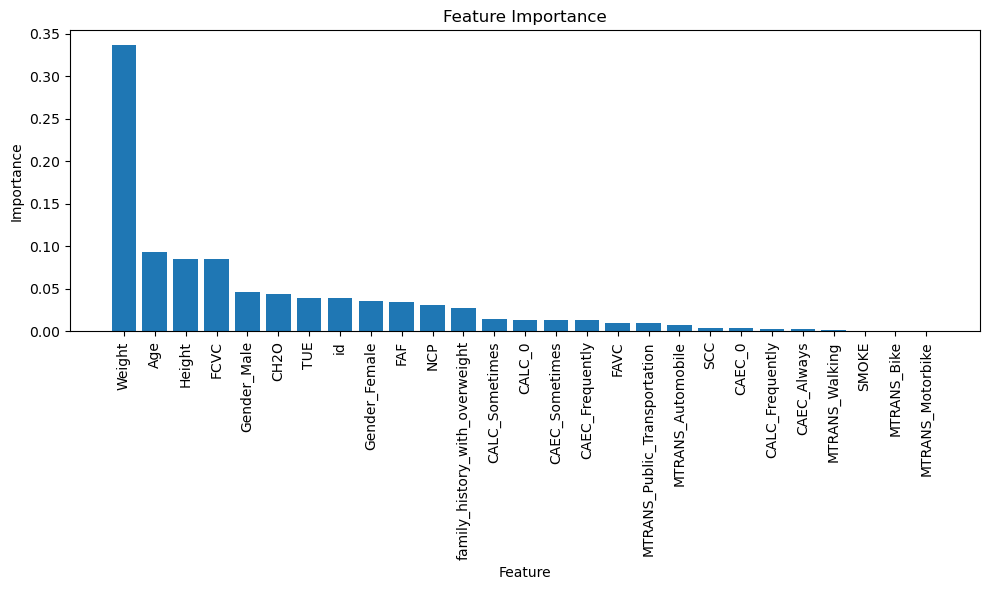

In [14]:
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest classifier from the previous code
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features (columns)
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report


# Predict the target variable on the test data
predictions = nb_classifier.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.70      0.83      0.76       524
     Obesity_Type_I       0.38      0.66      0.49       543
    Obesity_Type_II       0.79      0.92      0.85       657
   Obesity_Type_III       0.95      1.00      0.97       804
 Overweight_Level_I       0.62      0.32      0.42       484
Overweight_Level_II       0.56      0.29      0.38       514
      normal_weight       0.64      0.47      0.54       626

           accuracy                           0.67      4152
          macro avg       0.66      0.64      0.63      4152
       weighted avg       0.69      0.67      0.66      4152



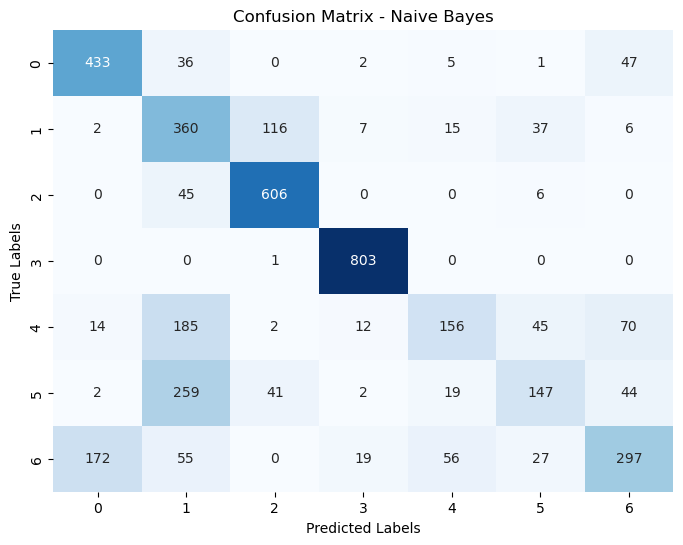

In [19]:
predictions_nb = nb_classifier.predict(X_test)

# Generate a confusion matrix
cm_nb = confusion_matrix(y_test, predictions_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

DECISION TREE CLASSIFIER

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test data
predictions_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Decision Tree Accuracy:", accuracy_dt)





Decision Tree Accuracy: 0.8470616570327553


In [25]:
# Generate a classification report
report_dt = classification_report(y_test, predictions_dt)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.88      0.89       524
     Obesity_Type_I       0.82      0.81      0.82       543
    Obesity_Type_II       0.96      0.94      0.95       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.66      0.68      0.67       484
Overweight_Level_II       0.70      0.72      0.71       514
      normal_weight       0.80      0.79      0.79       626

           accuracy                           0.85      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.85      0.85      0.85      4152



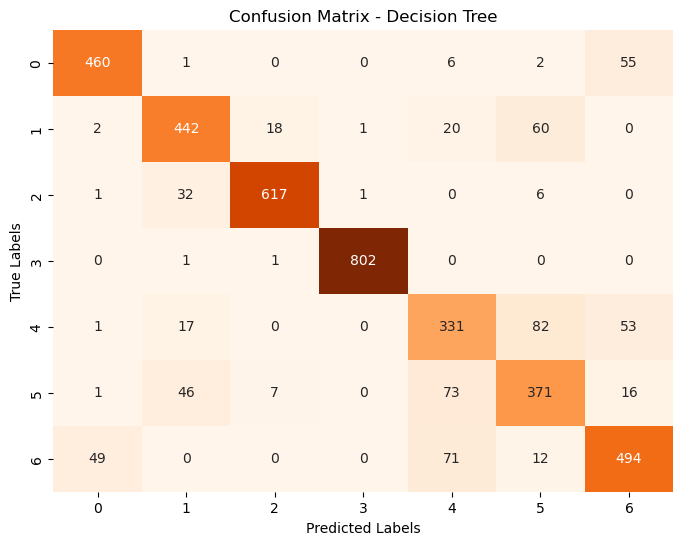

In [24]:
# Generate a confusion matrix
cm_dt = confusion_matrix(y_test, predictions_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


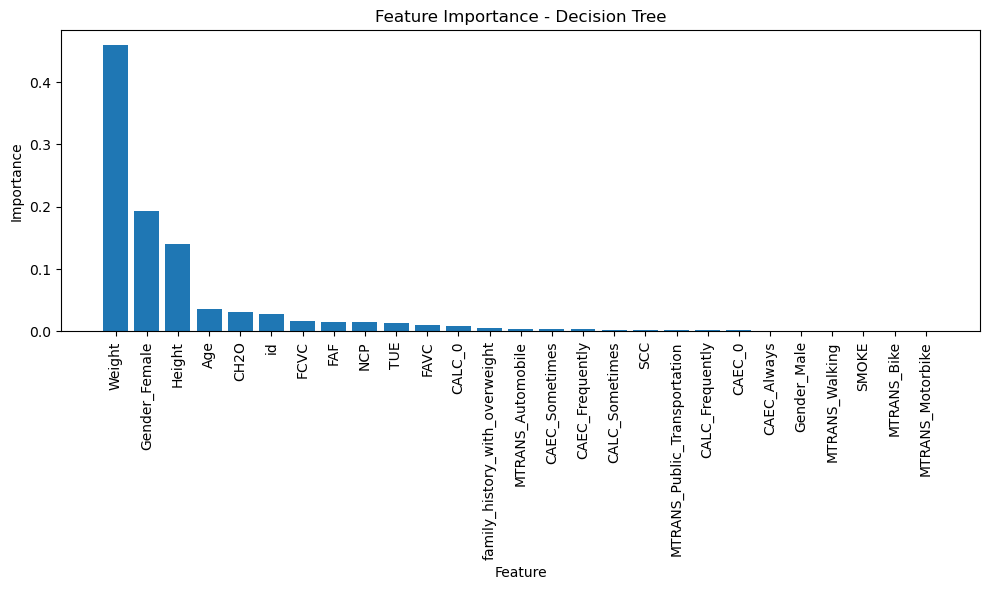

In [22]:
# Plotting the feature importance graph for Decision Tree
feature_importances_dt = dt_classifier.feature_importances_
sorted_indices_dt = feature_importances_dt.argsort()[::-1]
sorted_feature_importances_dt = feature_importances_dt[sorted_indices_dt]
sorted_feature_names_dt = X.columns[sorted_indices_dt]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances_dt)), sorted_feature_importances_dt, align='center')
plt.xticks(range(len(sorted_feature_importances_dt)), sorted_feature_names_dt, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()
